In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [40]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ('StandardScaler', num_transformer, num_features),
    ('OneHotEncoder', cat_transformer, cat_features)
])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [43]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    return r2, mae, mse, rmse

In [44]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=False),
    'XGBRegressor': XGBRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    r2_train, mae_train, mse_train, rmse_train = evaluate_model(y_train, y_train_pred)

    r2_test, mae_test, mse_test, rmse_test = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print('- R^2 score: {:.4f}'.format(r2_train))
    print('- MAE: {:.4f}'.format(mae_train))
    print('- MSE: {:.4f}'.format(mse_train))
    print('- RMSE: {:.4f}'.format(rmse_train))

    print('-'*35)

    print('Model performance for Test set')
    print('- R^2 score: {:.4f}'.format(r2_test))
    print('- MAE: {:.4f}'.format(mae_test))
    print('- MSE: {:.4f}'.format(mse_test))
    print('- RMSE: {:.4f}'.format(rmse_test))
    r2_list.append(r2_test)

    print('='*35)
    print('')

Linear Regression
Model performance for Training set
- R^2 score: 0.8743
- MAE: 4.2667
- MSE: 28.3349
- RMSE: 5.3231
-----------------------------------
Model performance for Test set
- R^2 score: 0.8804
- MAE: 4.2148
- MSE: 29.0952
- RMSE: 5.3940

Lasso
Model performance for Training set
- R^2 score: 0.8072
- MAE: 5.2053
- MSE: 43.4611
- RMSE: 6.5925
-----------------------------------
Model performance for Test set
- R^2 score: 0.8254
- MAE: 5.1557
- MSE: 42.4756
- RMSE: 6.5173

Ridge
Model performance for Training set
- R^2 score: 0.8743
- MAE: 4.2650
- MSE: 28.3377
- RMSE: 5.3233
-----------------------------------
Model performance for Test set
- R^2 score: 0.8806
- MAE: 4.2111
- MSE: 29.0566
- RMSE: 5.3904

K-Neighbors Regressor
Model performance for Training set
- R^2 score: 0.8559
- MAE: 4.5083
- MSE: 32.4802
- RMSE: 5.6991
-----------------------------------
Model performance for Test set
- R^2 score: 0.7840
- MAE: 5.5990
- MSE: 52.5714
- RMSE: 7.2506

Decision Tree
Model perf

## Results

In [48]:
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
2,Ridge,0.880592
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852481
7,CatBoostRegressor,0.851831
6,AdaBoostRegressor,0.848977
1,Lasso,0.825447
8,XGBRegressor,0.821221
3,K-Neighbors Regressor,0.783958
4,Decision Tree,0.753902


## Linear Regression

In [49]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train_scaled, y_train)
y_pred = lin_model.predict(X_test_scaled)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted output')

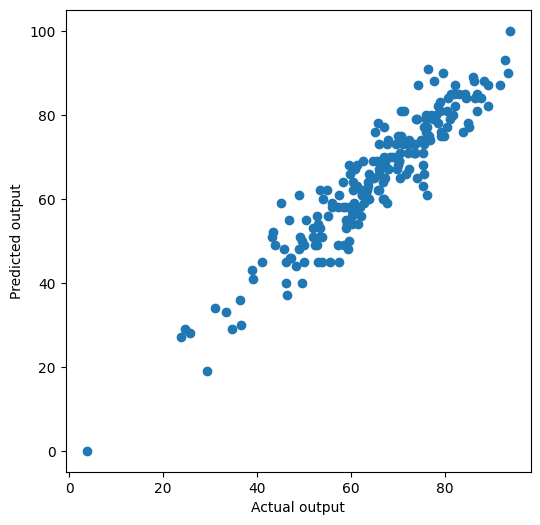

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred, y_test)
plt.xlabel('Actual output')
plt.ylabel('Predicted output')


<Axes: xlabel='math score'>

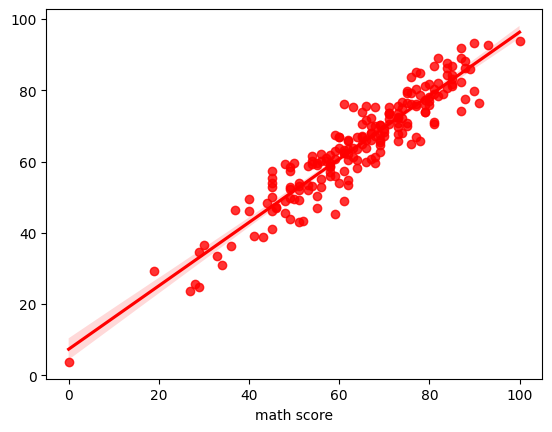

In [51]:
sns.regplot(x=y_test, y=y_pred, color='red')

## Difference between Actial and Predicted Values

In [53]:
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
